# PLOT 1: von neuman entropy (mott insulator)

we calculate with DMRG the von neuman entropy for different values of the system size (L).

we fized the parameters to $J=0.2$, $\mu=0.4$ and $g=0.1$ (cost function).

The truncation maximum number is $N_{max}=4$ (maximum number of states in one site. $N_{max}^{bosons}=N_{max}-1=3$).

We changed the truncation size $m$ in the range [10,30].

In [173]:
import matplotlib.pyplot as plt
import numpy as np

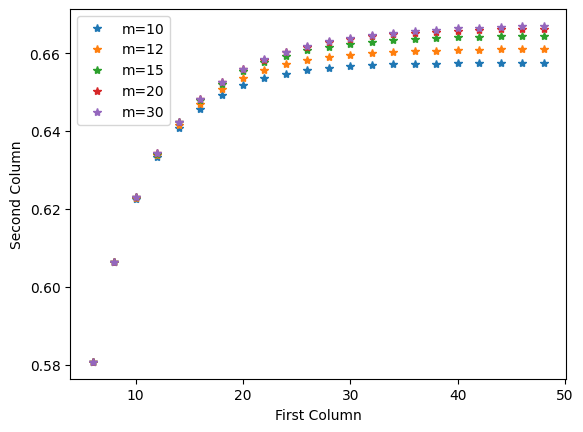

In [174]:
m_s = [10, 12, 15, 20, 30]

for m in m_s:
    file = open("dati/mu04_J02_Nmax4_m"+str(m), "r")
    datas = []
    for row in file:
        x, y = map(float, row.strip().split())
        datas.append((x, y))

    x, y = zip(*datas)
    plt.plot(x, y, "*", label="m="+str(m))
plt.xlabel('First Column')
plt.ylabel('Second Column')
plt.legend()
plt.show()

# PLOT 2: von neuman entropy changing $g$

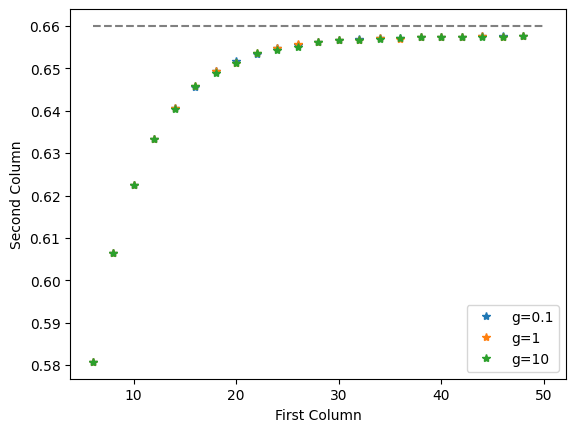

In [175]:
m_s = [ 0.1, 1, 10]

for m in m_s:
    file = open("dati/mu04_J02_Nmax4_m10_g_"+str(m), "r")
    datas = []
    for row in file:
        x, y = map(float, row.strip().split())
        datas.append((x, y))

    x, y = zip(*datas)
    plt.plot(x, y, "*", label="g="+str(m))
plt.plot([6,50],[0.66,0.66], "gray", linestyle="--")
plt.xlabel('First Column')
plt.ylabel('Second Column')
plt.legend()
plt.show()

# PLOT 3: von neuman entropy (superfluid phase)

we calculate with DMRG the von neuman entropy for different values of the system size (L).

we fized the parameters to $J=0.5$, $\mu=0.4$ and $g=1$ (cost function).

The truncation maximum number is $N_{max}=4$ (maximum number of states in one site. $N_{max}^{bosons}=N_{max}-1=3$).

We changed the truncation size $m$ in the range [10,30].

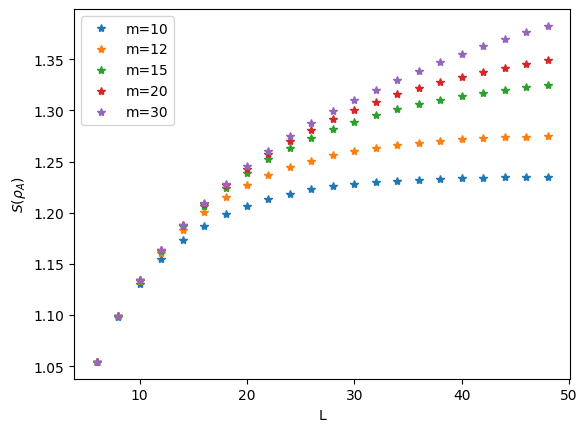

In [176]:
m_s = [10, 12, 15, 20, 30]

for m in m_s:
    file = open("dati/mu04_J05_Nmax4_m"+str(m), "r")
    datas = []
    for row in file:
        x, y = map(float, row.strip().split())
        datas.append((x, y))

    x, y = zip(*datas)
    plt.plot(x, y, "*", label="m="+str(m))
plt.ylabel(r'$S(\rho_A)$')
plt.xlabel('L')
plt.legend()
plt.show()

# PLOT 3: Plot phase diagram

fixed parameters:

- $m = 10$
- $N_{max} = 4 \ ; \ N \in \{0,1,2,3\}$
- $L = 20$ sites

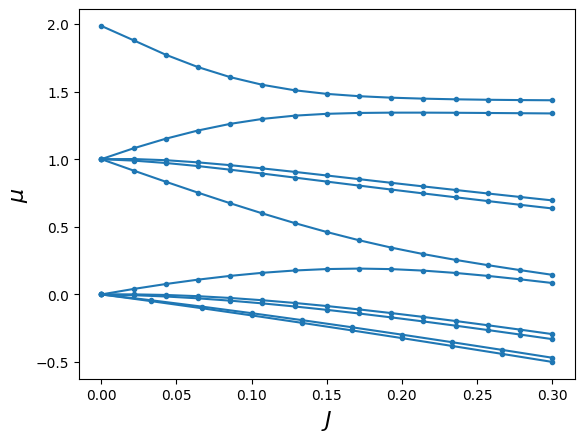

In [177]:
names = ["phase_diag__Nmax4_m10_g1_1-2_1", "phase_diag__Nmax4_m10_g10_2", "phase_diag__Nmax4_m10_g10_3-2", "phase_diag__Nmax4_m10_g10_1-4"]

all_datas = {}
Js = {}

def get_colors(num_vals):
    colors = []
    for _ in range(num_vals):
        r = np.random.random()
        b = np.random.random()
        g = np.random.random()
        
        colors.append((r, g, b))
    return colors

for name in names:
    file = open("dati/"+name)
    Js[name] = []
    all_datas[name] = [[],[],[],[]]

    FIRST = True
    for row in file:
        data = row.strip().split()

        if FIRST == True:
            FIRST = False
            colors = get_colors(len(data)-1)
        
        J = float(data[0])
        Js[name].append(J)

        datas = list(map(float, data[1:]))
        for i in range(len(datas)):
            all_datas[name][i].append(datas[i])

        #X = len(datas)*[J]
        #for i, color in enumerate(colors):
        #    plt.plot(X[i], datas[i], linestyle="-", marker=".", c="red")#color)

    for i in range(4):
        if len(all_datas[name][i]) == len(Js[name]):
            plt.plot(Js[name], all_datas[name][i], linestyle="-", marker=".", c="tab:blue")

plt.xlabel(r'$J$', fontsize=16)
plt.ylabel(r'$\mu$', fontsize=16)
#plt.legend()
plt.show()

# PLOT 4: Correlators

the fixed parameters are: $U = 1$, $\mu=0.4$, $N_{max}=4$, $g=1$.

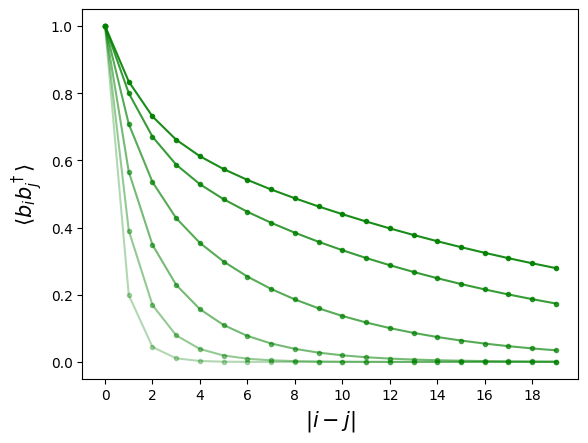

In [178]:
name = "dati/correlators_mu04_Nmax4_m_10.txt"

file = open(name)

alphas = np.linspace(0.3,.9, 6)

all_datas_corr = []
Js_corr = []

for i, row in enumerate(file):
    data = row.strip().split()
    
    J = float(data[0])
    Js_corr.append(J)

    datas = list(map(float, data[1:]))
    all_datas_corr.append(datas)

    X = np.arange(0,20)
    plt.plot(X, datas, linestyle="-", marker=".", c="green", alpha=alphas[i], label="J = %.2f"%J)
            
plt.xlabel(r'$|i-j|$', fontsize=15)
plt.ylabel(r'$\langle b_i b_j^\dagger \rangle$', fontsize=15)
plt.xticks(np.arange(0,19,step=2))
#plt.legend()
plt.show()

# critical exponents

In [179]:
name = "dati/correlators_mu04_Nmax4_m_10_.txt"

file = open(name)

alphas = np.linspace(0.3,.9, 6)

all_datas_corr = []
Js_corr = []

for i, row in enumerate(file):
    data = row.strip().split()
    
    J = float(data[0])
    Js_corr.append(J)

    datas = list(map(float, data[1:]))
    all_datas_corr.append(datas)

from scipy.optimize import curve_fit

def line(x, m, q):
    return m * x + q

## superfluid

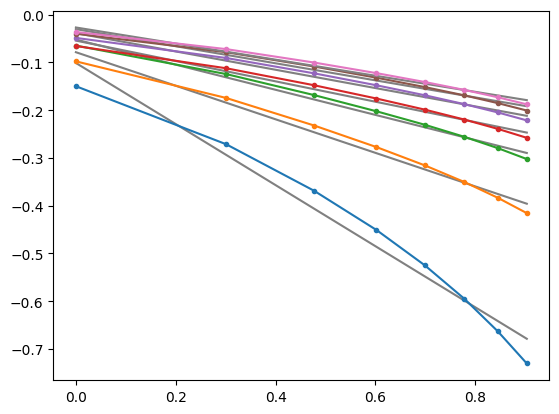

In [180]:

Ks = []
dKs = []

# superfluid phase
first_index = 3
last_index = 10
N_points = 9
for i,J in enumerate(Js_corr[first_index:last_index]):
    X = np.log10(np.arange(1,N_points,step=1))
    Y = np.log10(all_datas_corr[first_index+i][1:N_points])
    result, cov = curve_fit(line, X, Y)
    Ks.append(-result[0]/2)
    dKs.append(cov[0][0]**.5)

    plt.plot(X, line(X, result[0], result[1]), color="gray")
    plt.plot(X,Y, marker=".")

plt.show()

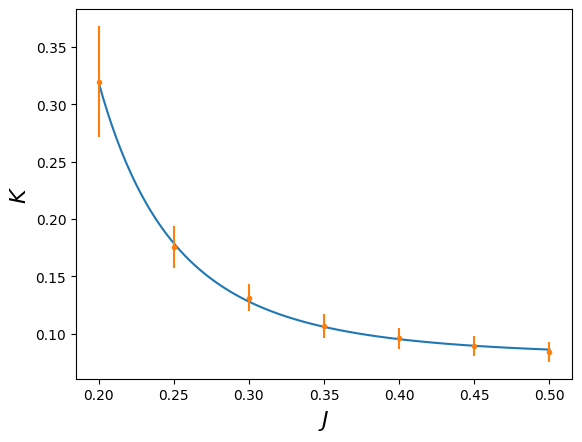

In [181]:
def expo(x, a, b, c):
    return a*x**b + c

result, cov = curve_fit(expo, Js_corr[first_index:last_index], Ks, p0=[0.04, -1, 0])

X = np.linspace(min(Js_corr[first_index:last_index]), max(Js_corr[first_index:last_index]), 100)
Y = expo(X, result[0], result[1], result[2])
plt.plot(X, Y)
plt.errorbar(Js_corr[first_index:last_index], Ks, dKs, linestyle="", marker=".")
plt.xlabel(r"$J$", fontsize=16)
plt.ylabel(r"$K$", fontsize=16)
plt.show()

In [182]:
result

array([ 4.14157639e-04, -3.95150450e+00,  7.97931502e-02])

In [183]:
cov

array([[ 9.94220224e-09,  1.45875069e-05, -2.01961188e-07],
       [ 1.45875069e-05,  2.14640212e-02, -2.90812460e-04],
       [-2.01961188e-07, -2.90812460e-04,  5.59398618e-06]])

In [184]:
# insulator phase
for i,J in enumerate(Js_corr[0:2]):
    X = np.arange(1,8,step=1)
    Y = np.log(all_datas_corr[i][1:8])
    result, _ = curve_fit(line, X, Y)